# CMPT 2091 Final Project: Data Management and Analysis with Yelp API and Apache Spark

Group Members:
**Jasraj Singh , ID:3107703**

**Vishaldeep Singh , ID:3103638**

File Name should include all the names of your group members - FirstName_LastName_DBMS_Final_Project.ipynb

### **Part One: Data Collection with Yelp API**


1.1 - Setup Yelp API
Before collecting data, you'll need to set up access to the Yelp API. Make sure you have your API key as outlined in the final project assignment document.

In [1]:
# Set up the Yelp API Key
api_key = 'sxJVF2VnvTFDyPGvL-60Ydv8_4qzqhvXRvoqKm3057NuDCTLNy8TEnxrO9H76RFoUaO7t75BdjIjQBd4WznxrFOCMUWh9kUD6Fp6471KJLojayZtELNr5N3DG4tfZ3Yx'  # Replace with your API key
# Yelp API endpoint for Business Search
endpoint_url = 'https://api.yelp.com/v3/businesses/search'

# Headers for authenticating the API request
headers = {
    'Authorization': f'Bearer {api_key}',
 }

1.2 - Making an API Request and Extracting Data
Use the Yelp API to fetch data based on your business idea. Adjust the parameters as necessary (location, categories, price range, etc.).

In [2]:
import requests
import pandas as pd

# Parameters
locations = ['San Francisco', 'New York', 'Chicago', 'California', 'Boston']
terms = ['Restaurants', 'Cafes', 'Bars']
limit_per_request = 40
offset_range = range(0, 201, limit_per_request)

# Data collection
complete_dataset = []

for location in locations:
    for term in terms:
        for offset in offset_range:
            print(f"Fetching data for Location: {location}, Term: {term}, Offset: {offset}")
            params = {
                'location': location,
                'term': term,
                'limit': limit_per_request,
                'offset': offset,
            }
            response = requests.get(endpoint_url, headers=headers, params=params)
            if response.status_code == 200:
                data = response.json()
                businesses = data.get('businesses', [])
                complete_dataset.extend(businesses)
            else:
                print(f"Error: {response.status_code} - {response.text}")

Fetching data for Location: San Francisco, Term: Restaurants, Offset: 0
Fetching data for Location: San Francisco, Term: Restaurants, Offset: 40
Fetching data for Location: San Francisco, Term: Restaurants, Offset: 80
Fetching data for Location: San Francisco, Term: Restaurants, Offset: 120
Fetching data for Location: San Francisco, Term: Restaurants, Offset: 160
Fetching data for Location: San Francisco, Term: Restaurants, Offset: 200
Fetching data for Location: San Francisco, Term: Cafes, Offset: 0
Fetching data for Location: San Francisco, Term: Cafes, Offset: 40
Fetching data for Location: San Francisco, Term: Cafes, Offset: 80
Fetching data for Location: San Francisco, Term: Cafes, Offset: 120
Fetching data for Location: San Francisco, Term: Cafes, Offset: 160
Fetching data for Location: San Francisco, Term: Cafes, Offset: 200
Fetching data for Location: San Francisco, Term: Bars, Offset: 0
Fetching data for Location: San Francisco, Term: Bars, Offset: 40
Fetching data for Locatio

1.3 - Save Data to CSV
Once the data is collected, save it to a CSV file for future use.

In [3]:
df = pd.DataFrame(complete_dataset)
df.to_csv('yelp_data.csv', index=False)

**1.4 - Business Idea Explanation**

In this section, explain the business idea and why the data points (like business name, rating, price, etc.) are important for your application.

### Business Idea: Meals & Drinks Explorer


**Purpose:** The purpose of this system is to target restaurant or cafe or bar kind of businesses for consumption of food and beverages. It assists the user in identifying areas of a city which they would be interested in dining or drinking in according to the user’s preferences such as price rating and location while on a trip.


**Business Name:** Determines the type of food and, in some cases, beverage and drink business, for example, restaurant, café, bar, and so on.

**Ratings:** Enables the user provide previous customer feedback to settle on high ranked businesses thus reliable recommendations.

**Price Range:** Limits the choices depending on the user’s budgeted amount so that it only provides sets that are within the user’s desired finance range.

**Categories:** Categorizes business into types i.e Restaurants, Cafes & Bars and allows users to specifically search for what they want.

**Location:** Has filtering by distance, searching for businesses close to currently used coordinates or a place of stay.

# **Part Two: Data Management with Apache Spark**
**2.1- Setting Up PySpark**

Now that we have the Yelp data, we'll set up Apache Spark to handle large datasets.

In [4]:
!pip install pyspark
!pip install findspark

In [5]:
# Importing necessary libraries for PySpark
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName('FinalProject').getOrCreate()

# Check if Spark session is initialized
spark

**2.2 - Loading Data into Spark DataFrame**

We'll load the data collected from Yelp into a Spark DataFrame.

In [6]:
# Load the Yelp CSV data into a Spark DataFrame
yelp_data = spark.read.csv('yelp_data.csv', header=True, inferSchema=True)

# Display the schema and preview the data
yelp_data.printSchema()
yelp_data.show(5)

root
 |-- id: string (nullable = true)
 |-- alias: string (nullable = true)
 |-- name: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- is_closed: boolean (nullable = true)
 |-- url: string (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- categories: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- coordinates: string (nullable = true)
 |-- transactions: string (nullable = true)
 |-- price: string (nullable = true)
 |-- location: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- display_phone: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- business_hours: string (nullable = true)
 |-- attributes: string (nullable = true)

+--------------------+--------------------+--------------------+--------------------+---------+--------------------+------------+--------------------+------+--------------------+--------------------+-----+--------------------+------------+--------------+----------------

In [7]:
yelp_data = yelp_data.drop('url', 'coordinates','image_url')
yelp_data.show(5)

+--------------------+--------------------+--------------------+---------+------------+--------------------+------+--------------------+-----+--------------------+------------+--------------+------------------+--------------------+--------------------+
|                  id|               alias|                name|is_closed|review_count|          categories|rating|        transactions|price|            location|       phone| display_phone|          distance|      business_hours|          attributes|
+--------------------+--------------------+--------------------+---------+------------+--------------------+------+--------------------+-----+--------------------+------------+--------------+------------------+--------------------+--------------------+
|QueFVMcMlT-6aZFv2...|bottega-san-franc...|             Bottega|    false|        1288|[{'alias': 'itali...|   4.3|['pickup', 'deliv...|   $$|{'address1': '113...|+14156559048|(415) 655-9048|1506.2503434999724|[{'open': [{'is_o...|{'business

In [8]:
# Grouping by category and counting the number of businesses in each category
category_counts = yelp_data.groupBy('categories').count()

# Show the result
category_counts.show()

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|[{'alias': 'tea',...|    1|
|[{'alias': 'seafo...|    1|
|[{'alias': 'georg...|    1|
|[{'alias': 'karao...|    1|
|[{'alias': 'baker...|    1|
|[{'alias': 'music...|    2|
|[{'alias': 'beerb...|    6|
|[{'alias': 'garde...|    1|
|[{'alias': 'peruv...|    1|
|[{'alias': 'japan...|    1|
|[{'alias': 'burge...|    2|
|[{'alias': 'newme...|    1|
|[{'alias': 'coffe...|    2|
|[{'alias': 'disti...|    1|
|[{'alias': 'newam...|    1|
|[{'alias': 'trada...|    1|
|[{'alias': 'pizza...|    2|
|[{'alias': 'korea...|    9|
|[{'alias': 'korea...|    1|
|[{'alias': 'irish...|    1|
+--------------------+-----+
only showing top 20 rows



**2.3 - Basic Operations on Data Using Spark DataFrame**

Here, you can perform basic transformations and operations, such as filtering, grouping, and aggregating.

*   Example: Filtering businesses with a rating greater than 4
high_rated_businesses = yelp_data.filter(yelp_data['rating'] > 4)
high_rated_businesses.show(5)
*   Example: Grouping by category and counting the number of businesses
category_counts = yelp_data.groupBy('categories').count()
category_counts.show()
*   Example: Aggregating by category to calculate the average rating
average_rating = yelp_data.groupBy('categories').agg({'rating_count': 'avg'})
average_rating.show()

In [9]:
# Aggregating by category to calculate the average rating

category_average_rating = yelp_data.groupBy('categories').agg({'rating': 'avg'})
category_average_rating.show(5)

top_rated_shops = yelp_data.filter(yelp_data['rating'] > 4)
top_rated_shops.show(5)

business_count_by_category = yelp_data.groupBy('categories').count()
business_count_by_category.show(5)

price_range_business_count = yelp_data.groupBy('price').count()
price_range_business_count.show(5)

category_business_count = yelp_data.groupBy('categories').count()
category_business_count.show(5)



+--------------------+-----------+
|          categories|avg(rating)|
+--------------------+-----------+
|[{'alias': 'tea',...|        4.3|
|[{'alias': 'seafo...|        4.4|
|[{'alias': 'georg...|        4.5|
|[{'alias': 'karao...|        3.3|
|[{'alias': 'baker...|        4.1|
+--------------------+-----------+
only showing top 5 rows

+--------------------+--------------------+--------------------+---------+------------+--------------------+------+------------+-----+--------------------+------------+--------------+------------------+--------------------+--------------------+
|                  id|               alias|                name|is_closed|review_count|          categories|rating|transactions|price|            location|       phone| display_phone|          distance|      business_hours|          attributes|
+--------------------+--------------------+--------------------+---------+------------+--------------------+------+------------+-----+--------------------+------------+--

### Part Three: Data Analysis Using Spark SQL
**3.1 - Register DataFrame as Temp View**

We need to register the Spark DataFrame as a temporary SQL view to run SQL queries.

In [10]:
# Register DataFrame as a temporary SQL view
yelp_data.createOrReplaceTempView("yelp_businesses")

**3.2 - Spark SQL Queries for Data Analysis**

Now, we can perform SQL queries to analyze the Yelp data. You need to perform an analysis of your data using Spark SQL and you should perform **a minimum of 10 SQL operations** to gain meaningful insights from the data you extraction from part one.

In [11]:
# 1
# top 5 businesses by rating
top_rated_businesses = spark.sql("""
SELECT name, rating, price, location
FROM yelp_businesses
WHERE rating > 4
ORDER BY rating DESC
LIMIT 5
""")
top_rated_businesses.show()

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|      Caffé Vergnano|   5.0| NULL|{'address1': '800...|
|SHOWA Le Gourmet ...|   5.0| NULL|{'address1': '155...|
|              The VU|   5.0|    $|{'address1': '320...|
|        Sunset29 BBQ|   5.0| NULL|{'address1': None...|
|         Atrium Cafe|   5.0| NULL|{'address1': '260...|
+--------------------+------+-----+--------------------+



In [13]:
# 2
# number of businesses by price range
price_range_counts = spark.sql("""
SELECT price, COUNT(*) as num_businesses
FROM yelp_businesses
GROUP BY price
""")
price_range_counts.show()

+--------------------+--------------+
|               price|num_businesses|
+--------------------+--------------+
|                  $$|          1687|
|                 $$$|           276|
|                $$$$|            65|
|                NULL|          1070|
|{'latitude': 40.7...|             1|
|{'latitude': 40.7...|             1|
|                   $|           499|
|                   €|             1|
+--------------------+--------------+



In [14]:
# 3
# filter businesses with the '$' price range
yelp_data_with_price_class = spark.sql("""
    SELECT *
    FROM yelp_businesses
    WHERE price IN ('$')
""")
yelp_data_with_price_class.show(5)

+--------------------+--------------------+--------------------+---------+------------+--------------------+------+--------------------+-----+--------------------+------------+--------------+------------------+--------------------+--------------------+
|                  id|               alias|                name|is_closed|review_count|          categories|rating|        transactions|price|            location|       phone| display_phone|          distance|      business_hours|          attributes|
+--------------------+--------------------+--------------------+---------+------------+--------------------+------+--------------------+-----+--------------------+------------+--------------+------------------+--------------------+--------------------+
|SGRmnarrNuVEsAjYd...|el-farolito-san-f...|         El Farolito|    false|        5568|[{'alias': 'mexic...|   4.2|        ['delivery']|    $|{'address1': '277...|+14158247877|(415) 824-7877|1845.9442151607977|[{'open': [{'is_o...|{'business

In [41]:
# 4
# businesses that have both delivery and pickup options
delivery_and_pickup = spark.sql("""
SELECT name, transactions, rating, location
FROM yelp_businesses
WHERE transactions LIKE '%delivery%' AND transactions LIKE '%pickup%'
""")
delivery_and_pickup.show(10)

+--------------------+--------------------+------+--------------------+
|                name|        transactions|rating|            location|
+--------------------+--------------------+------+--------------------+
|             Bottega|['pickup', 'deliv...|   4.3|{'address1': '113...|
|        Horsefeather|['pickup', 'deliv...|   4.0|{'address1': '528...|
|      Marufuku Ramen|['pickup', 'deliv...|   4.5|{'address1': '158...|
|          Sotto Mare|['pickup', 'deliv...|   4.3|{'address1': '552...|
| Nepa Indian Cuisine|['delivery', 'res...|   4.8|{'address1': '507...|
|           Sisterita|['pickup', 'deliv...|   4.6|{'address1': '669...|
|Daeho Kalbijjim &...|['delivery', 'res...|   4.5|{'address1': '162...|
|      STK Steakhouse|['pickup', 'deliv...|   4.3|{'address1': '1 M...|
|        C.Q. Noodles|['pickup', 'deliv...|   4.4|{'address1': '212...|
|     Burma Superstar|['pickup', 'deliv...|   4.2|{'address1': '309...|
+--------------------+--------------------+------+--------------

In [16]:
# 5
# businesses with more than 100 reviews
popular_businesses = spark.sql("""
SELECT name, review_count, rating
FROM yelp_businesses
WHERE review_count > 100
ORDER BY review_count DESC
""")
popular_businesses.show(10)

+--------------------+------------+------+
|                name|review_count|rating|
+--------------------+------------+------+
|Brenda's French S...|       12535|   4.2|
|Fog Harbor Fish H...|       11348|   4.4|
|     Girl & The Goat|       10375|   4.4|
|Wildberry Pancake...|        9902|   4.4|
|Wildberry Pancake...|        9902|   4.4|
|           Au Cheval|        9158|   4.4|
|      Tartine Bakery|        9002|   4.2|
|      The Purple Pig|        8719|   4.3|
|            San Tung|        8409|   4.1|
|     Burma Superstar|        7779|   4.2|
+--------------------+------------+------+
only showing top 10 rows



In [18]:
# 6
# average rating of businesses by category
average_rating_by_category = spark.sql("""
SELECT categories, AVG(rating) as avg_rating
FROM yelp_businesses
GROUP BY categories
""")
average_rating_by_category.show(10)

+--------------------+----------+
|          categories|avg_rating|
+--------------------+----------+
|[{'alias': 'tea',...|       4.3|
|[{'alias': 'seafo...|       4.4|
|[{'alias': 'georg...|       4.5|
|[{'alias': 'karao...|       3.3|
|[{'alias': 'baker...|       4.1|
|[{'alias': 'music...|      4.35|
|[{'alias': 'beerb...|      4.05|
|[{'alias': 'garde...|       4.5|
|[{'alias': 'peruv...|       4.3|
|[{'alias': 'japan...|       4.4|
+--------------------+----------+
only showing top 10 rows



In [22]:
# 7
# businesses with 'coffee' in their name
coffee_shops = spark.sql("""
SELECT name, rating, price, location
FROM yelp_businesses
WHERE name LIKE '%coffee%'
""")
coffee_shops.show(10)

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|        temos coffee|   4.5|   $$|{'address1': '300...|
|Clingans Junction...|   4.8|   $$|{'address1': '355...|
|         Cuppacoffee|   4.1|    $|{'address1': '57 ...|
|         Cuppacoffee|   4.4|    $|{'address1': '1 M...|
|          APM coffee|   4.0|   $$|{'address1': '99 ...|
+--------------------+------+-----+--------------------+



In [30]:
# 8
# businesses with the highest price range
luxury_businesses = spark.sql("""
SELECT name, price, rating, location
FROM yelp_businesses
WHERE price = '$$$$'
""")
luxury_businesses.show(10)


+--------------------+-----+------+--------------------+
|                name|price|rating|            location|
+--------------------+-----+------+--------------------+
|            Birdsong| $$$$|   4.4|{'address1': '108...|
|          San Ho Won| $$$$|   4.5|{'address1': '217...|
|          Anomaly SF| $$$$|   4.8|{'address1': '260...|
|                Kiln| $$$$|   4.7|{'address1': '149...|
|     Niku Steakhouse| $$$$|   4.3|{'address1': '61 ...|
|          Rich Table| $$$$|   4.2|{'address1': '199...|
|State Bird Provis...| $$$$|   4.2|{'address1': '152...|
|        Miller & Lux| $$$$|   4.2|{'address1': '700...|
|             Aphotic| $$$$|   4.4|{'address1': '816...|
|Noodle in a Haystack| $$$$|   4.9|{'address1': '460...|
+--------------------+-----+------+--------------------+
only showing top 10 rows



In [31]:
# 9
# phone numbers of businesses with ratings above 4 and more than 100 reviews.
top_businesses_contact_info = spark.sql("""
SELECT name, display_phone, rating, review_count
FROM yelp_businesses
WHERE rating > 4 AND review_count > 30
ORDER BY rating DESC, review_count DESC
""")
top_businesses_contact_info.show(5)

+--------------------+--------------+------+------------+
|                name| display_phone|rating|review_count|
+--------------------+--------------+------+------------+
|        Mission Blue|(415) 508-7416|   5.0|         185|
|        Sunset29 BBQ|(415) 723-2929|   5.0|          65|
|Stogie's Gold Cou...|(209) 984-0584|   5.0|          56|
|             Wa Shin|(857) 289-9290|   5.0|          48|
|            Mono Inn|(760) 784-3266|   5.0|          47|
+--------------------+--------------+------+------------+
only showing top 5 rows



In [37]:
# 10
# businesses with no price information
no_price_businesses = spark.sql("""
SELECT name, rating, review_count, location,price
FROM yelp_businesses
WHERE price IS NULL
""")
no_price_businesses.show(10)

+--------------------+------+------------+--------------------+-----+
|                name|rating|review_count|            location|price|
+--------------------+------+------------+--------------------+-----+
|              Bodega|   4.4|         685|{'address1': '138...| NULL|
|     Kothai Republic|   4.6|         354|{'address1': '139...| NULL|
|          Four Kings|   4.3|         196|{'address1': '710...| NULL|
|      STK Steakhouse|   4.3|        2380|{'address1': '1 M...| NULL|
|SHOWA Le Gourmet ...|   5.0|          43|{'address1': '155...| NULL|
|          Bocconcino|   4.6|         150|{'address1': '516...| NULL|
|           Khao Tiew|   4.5|         208|{'address1': '272...| NULL|
|             Bansang|   4.2|         503|{'address1': '156...| NULL|
|Elena's Mexican R...|   4.0|         455|{'address1': '255...| NULL|
|          Memento SF|   4.7|          74|{'address1': '130...| NULL|
+--------------------+------+------------+--------------------+-----+
only showing top 10 

**3.3 - Data Visualization**

You can visualize the results of your Spark SQL analysis using libraries like Matplotlib or Seaborn.

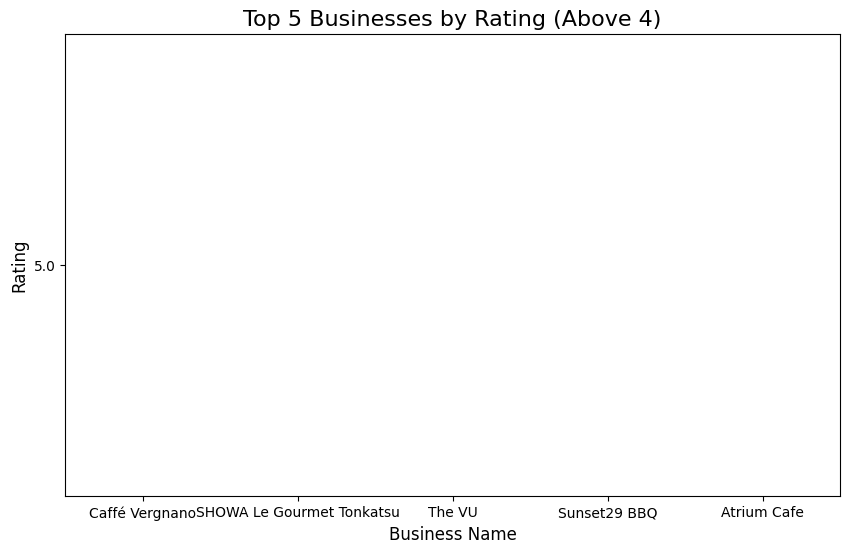

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query to get top 5 rated businesses
top_rated_businesses = spark.sql("""
SELECT name, rating, price, location
FROM yelp_businesses
WHERE rating > 4
ORDER BY rating DESC
LIMIT 5
""")

# Convert Spark DataFrame to Pandas DataFrame for visualization
top_rated_businesses_pandas = top_rated_businesses.toPandas()

# Plotting the number of businesses per category
plt.figure(figsize=(10,6))
sns.barplot(x='name', y='rating', data=top_rated_businesses_pandas)
plt.title('Top 5 Businesses by Rating (Above 4)', fontsize=16)
plt.xlabel('Business Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

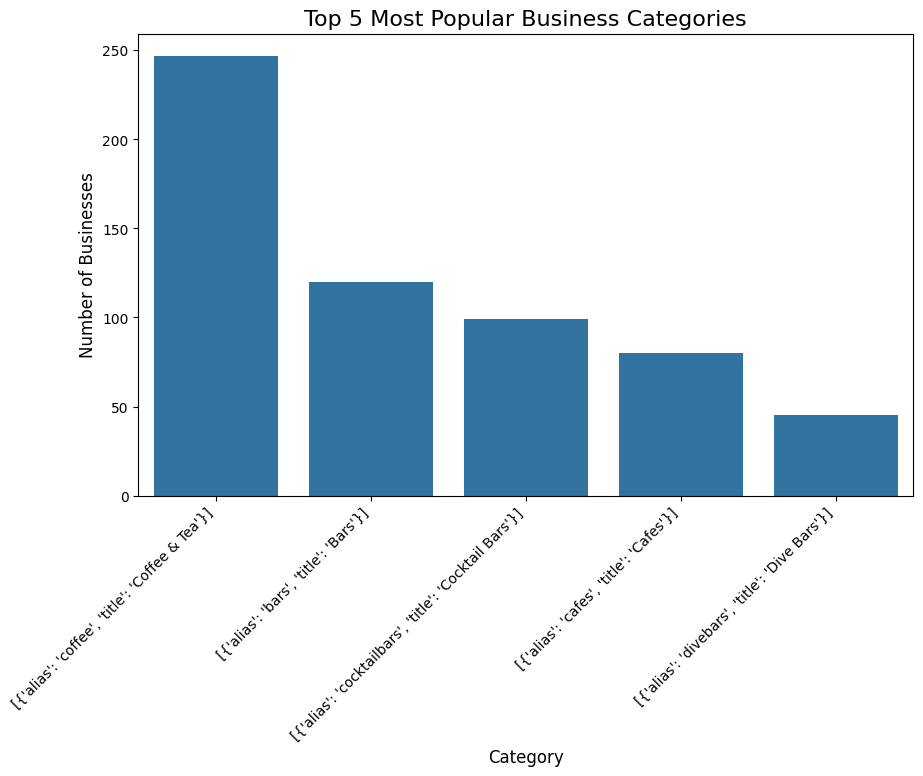

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = spark.sql("""
SELECT categories, COUNT(*) as num_businesses
FROM yelp_businesses
GROUP BY categories
ORDER BY num_businesses DESC
LIMIT 5
""")

category_counts_pandas = category_counts.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x='categories', y='num_businesses', data=category_counts_pandas)
plt.title('Top 5 Most Popular Business Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Businesses', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


<ipython-input-64-4ea6cf005ec5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='avg_rating', data=average_rating_by_category_pandas, palette='viridis')


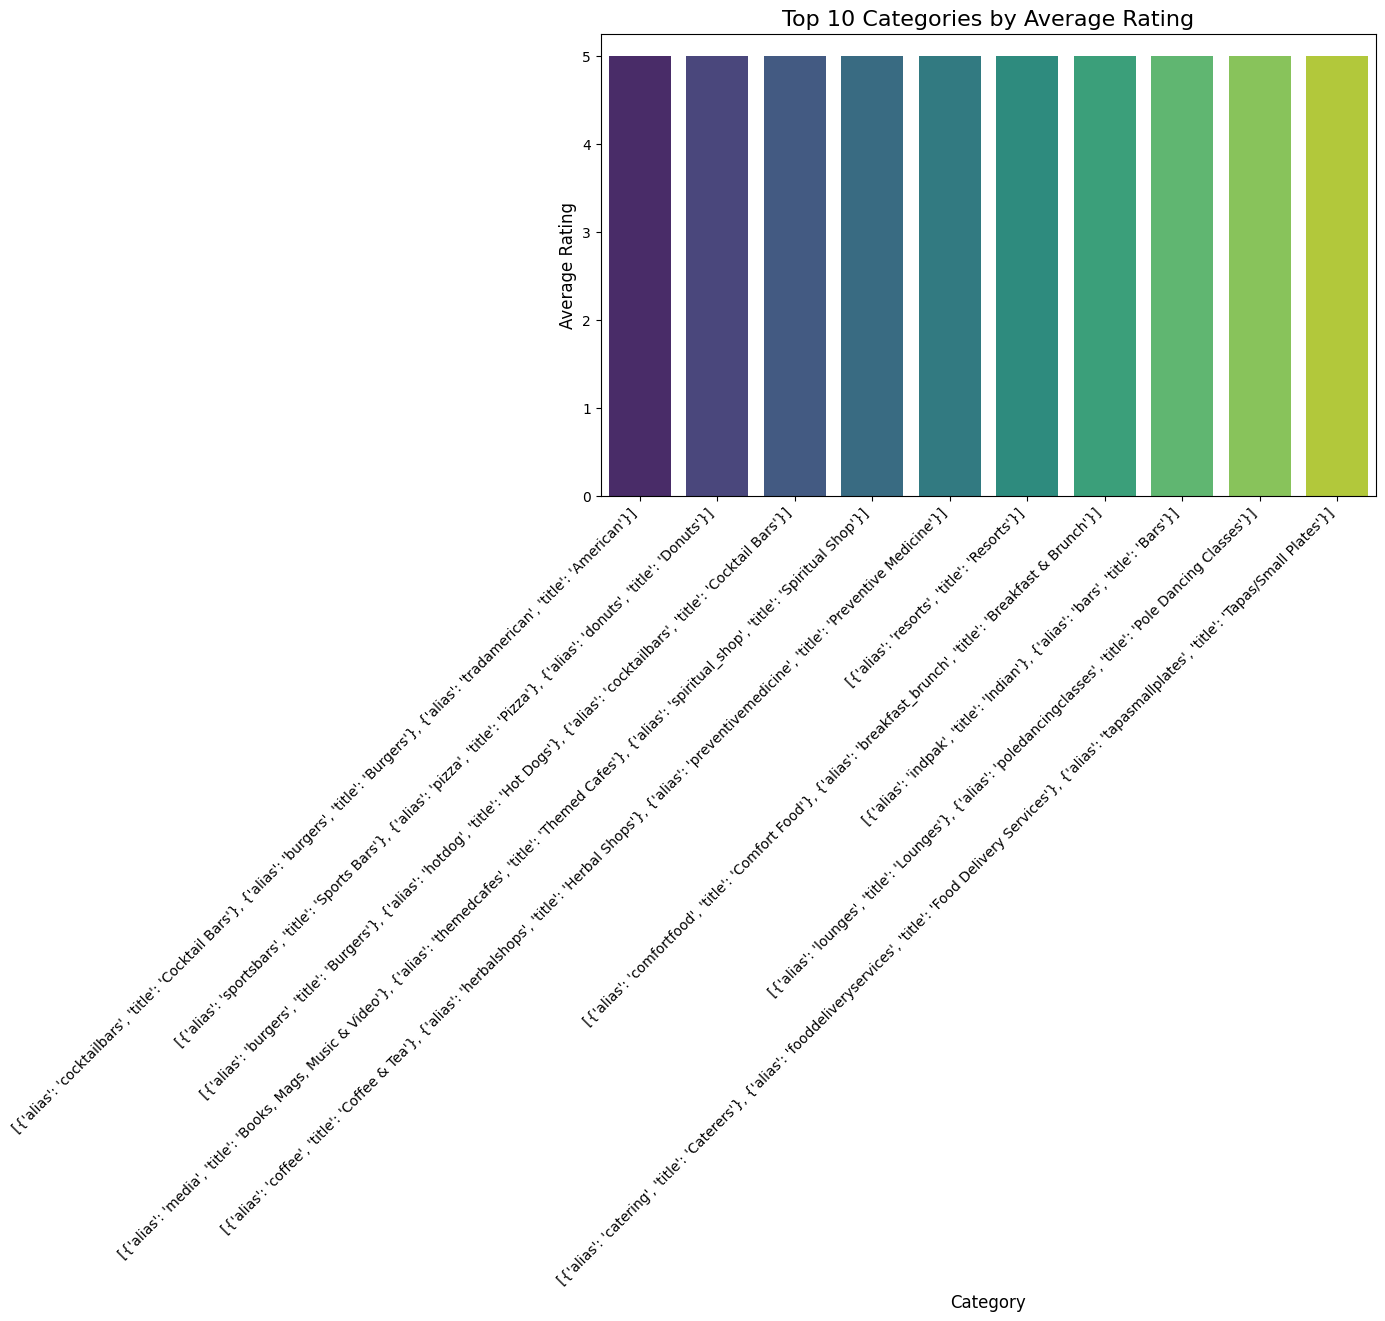

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

average_rating_by_category = spark.sql("""
SELECT categories, AVG(rating) as avg_rating
FROM yelp_businesses
GROUP BY categories
ORDER BY avg_rating DESC
LIMIT 10
""")

average_rating_by_category_pandas = average_rating_by_category.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x='categories', y='avg_rating', data=average_rating_by_category_pandas, palette='viridis')
plt.title('Top 10 Categories by Average Rating', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


##Conclusion

The project showed us that with Spark SQL, the Yelp dataset can be analyzed to give meaningful insights. Structural patterns are produced from using SQL queries: the highest-ranked businesses, business distribution across categories, and available services including delivery and pickup. . Extended this analysis by translating the results into visualisations that depicted trends in pricing and productive entrepreneurship. They offered the ideas of segments and competitors to the business which meant they were able to make better decisions. The project also raised awareness of how raw data, processed, and presented through structured data analysis and clear, simple graphics, can be valuable.

Conclusion & Next Steps

### Conclusion
Summarize the key findings from your analysis, explaining how they support your business idea. For example:

- **Top Rated Businesses**: We identified the highest-rated businesses, which are ideal candidates for recommendation.
- **Category Insights**: Our analysis showed which categories are most popular in the Yelp dataset.

### Future Steps
- **Expand Data Collection**: Collect more data points (e.g., reviews, more businesses).
- **Improve Recommendations**: Use the data to create a recommendation algorithm.
